In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [79]:
from dhdrnet.expected_steps import num_exposures_needed
import pandas as pd
from dhdrnet.util import ROOT_DIR
from matplotlib import pyplot as plt

In [98]:
# df = num_exposures_needed(runs=500)
df = pd.read_csv(ROOT_DIR/"precomputed_data" / "expected_captures.csv", index_col="image_name")
df

,metric,num_exposures,error
image_name,,,
0043_20160919_140610_616,psnr,1,7.245790
0043_20160919_140610_616,mse,1,12260.308029
0043_20160919_140610_616,sssim,1,0.355150
0043_20160919_140610_616,psnr,2,7.045839
0043_20160919_140610_616,mse,2,12837.972925
...,...,...,...
0155_20160816_114911_369,mse,5,1678.773960
0155_20160816_114911_369,sssim,5,0.904685
0155_20160816_114911_369,psnr,6,23.270790


In [99]:
df = df.replace("sssim", "ssim")
df

,metric,num_exposures,error
image_name,,,
0043_20160919_140610_616,psnr,1,7.245790
0043_20160919_140610_616,mse,1,12260.308029
0043_20160919_140610_616,ssim,1,0.355150
0043_20160919_140610_616,psnr,2,7.045839
0043_20160919_140610_616,mse,2,12837.972925
...,...,...,...
0155_20160816_114911_369,mse,5,1678.773960
0155_20160816_114911_369,ssim,5,0.904685
0155_20160816_114911_369,psnr,6,23.270790


In [100]:
stats = df.groupby(["metric","num_exposures"]).describe()["error"].drop(["25%", "50%", "75%","count"],axis=1)
stats.to_latex(ROOT_DIR/"figures"/"expected_steps.tex")
stats

mean          std        min           max
metric num_exposures                                                   
mse    1              3474.073362  3853.248159  23.744126  14656.771315
       2              2260.923828  3015.843608   4.384672  14841.404244
       3              1574.867993  2421.942911   3.304258  13782.966796
       4              1118.562032  1785.761718   6.910735  11778.551164
       5               793.472097  1377.999026   7.585378  10904.052095
       6               583.296697  1024.861731   2.558349   7497.380370
psnr   1                16.393416     6.452302   6.470420     34.375242
       2                18.783955     6.685045   6.416054     41.711433
       3                20.557789     6.581760   6.737377     42.940064
       4                21.782207     6.341851   7.419885     39.735561
       5                23.639801     6.345882   7.754924     39.331031
       6                24.625003     6.128339   9.381708     44.051205
ssim   1                 0.718822     0.272602   0.030667      0.987464
       2                 0.799575     0.234686   0.039838      0.993982
       3                 0.850721     0.201178   0.028980      0.996080
       4                 0.891684     0.153854   0.111053      0.997728
       5                 0.922599     0.118242   0.190204      0.996507
       6                 0.938665     0.103346   0.319563      0.998082

<Figure size 432x288 with 0 Axes>

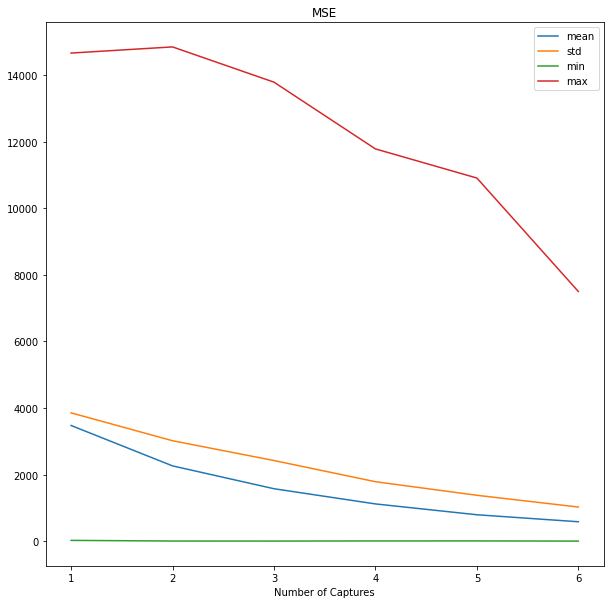

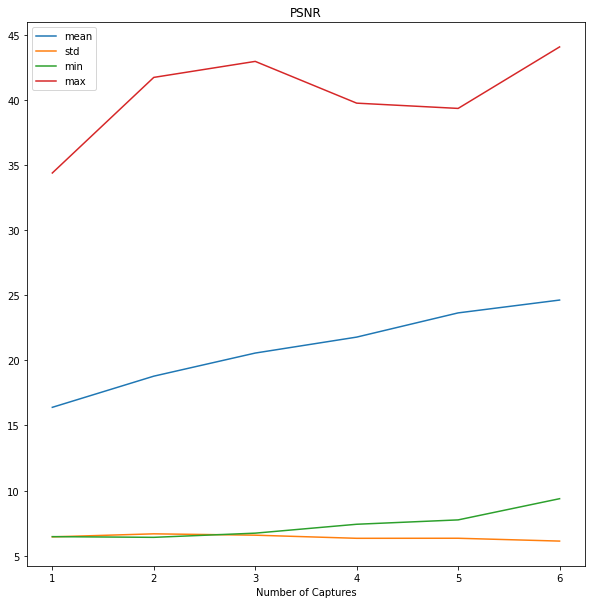

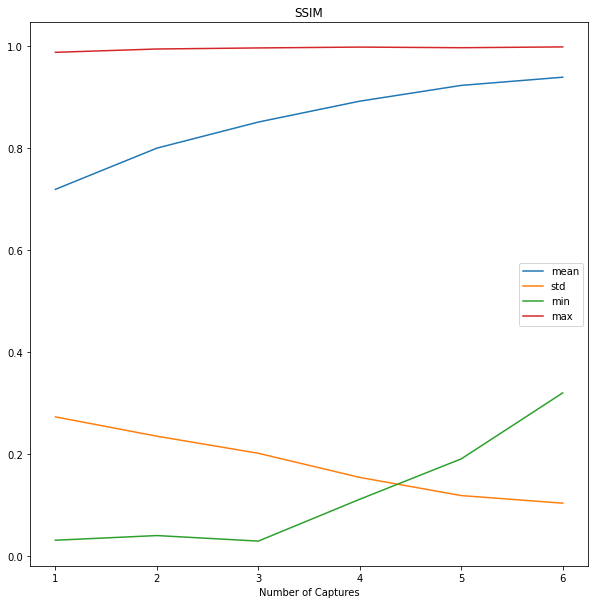

In [107]:
sg = stats.groupby("metric")
plt.tight_layout()
for name, group in sg:
    ax = group.loc[name].plot(
        title=name.upper(),
        xlabel="Number of Captures",
        subplots=False, 
        figsize=(10, 10),
        use_index=True,
        layout=(2,2),
    )
    ax.figure.savefig(ROOT_DIR/"figures"/f"{name}_expected_captures.pdf")
    


In [106]:
df.to_csv(ROOT_DIR / "precomputed_data" / "expected_captures.csv")